In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

import warnings
warnings.filterwarnings("ignore")

#### Load the Dataset

In [4]:
df=pd.read_csv("USA_Housing.csv")
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


##### Basic EDA

In [5]:
df.shape

(5000, 7)

In [6]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [8]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [9]:
df.head(3)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."


In [10]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [11]:
Variance=np.var(df["Avg. Area Income"])
Variance

113570058.15874238

In [12]:
Variance=np.var(df["Avg. Area House Age"])
Variance

0.9827887594481672

In [13]:
Variance=np.var(df["Avg. Area Number of Rooms"])
Variance

1.0114981490440815

In [14]:
Variance=np.var(df["Avg. Area Number of Bedrooms"])
Variance

1.5227901710999985

In [15]:
Variance=np.var(df["Area Population"])
Variance

98498826.46961212

In [16]:
Variance=np.var(df["Price"])
Variance

124667119790.60107

In [17]:
# Unique elements
df.nunique()

Avg. Area Income                5000
Avg. Area House Age             5000
Avg. Area Number of Rooms       5000
Avg. Area Number of Bedrooms     255
Area Population                 5000
Price                           5000
Address                         5000
dtype: int64

In [18]:
df["Avg. Area Number of Bedrooms"].unique()

array([4.09, 3.09, 5.13, 3.26, 4.23, 4.04, 3.41, 2.42, 2.3 , 6.1 , 4.1 ,
       4.49, 3.1 , 2.27, 4.37, 4.01, 3.12, 4.3 , 5.12, 5.49, 4.07, 2.1 ,
       4.31, 6.34, 4.33, 2.03, 4.  , 3.04, 3.24, 4.42, 5.36, 6.29, 6.  ,
       2.07, 3.01, 2.39, 2.5 , 2.17, 6.3 , 4.43, 4.44, 6.32, 3.18, 6.35,
       3.22, 2.13, 4.02, 6.36, 3.32, 4.12, 6.41, 5.08, 3.06, 2.28, 4.2 ,
       4.32, 5.43, 3.13, 3.28, 3.27, 3.08, 3.17, 3.15, 6.25, 3.43, 4.38,
       6.16, 4.28, 4.11, 6.24, 3.35, 4.48, 3.2 , 3.07, 3.39, 3.38, 6.06,
       3.3 , 3.46, 3.33, 4.41, 2.38, 2.37, 3.45, 2.02, 2.14, 2.23, 2.44,
       2.29, 4.19, 6.04, 5.28, 5.1 , 5.45, 4.36, 2.05, 6.39, 4.45, 4.22,
       6.44, 4.35, 3.37, 6.2 , 6.19, 2.49, 2.04, 4.46, 5.15, 3.21, 6.45,
       3.44, 2.18, 3.49, 6.26, 4.14, 4.27, 5.04, 4.06, 6.4 , 3.25, 5.33,
       3.  , 2.47, 3.31, 3.14, 4.18, 5.07, 6.11, 2.  , 5.3 , 4.26, 2.31,
       3.48, 3.29, 3.11, 3.36, 2.15, 6.18, 5.25, 4.47, 5.21, 4.15, 6.37,
       6.49, 6.28, 2.09, 4.29, 6.21, 2.08, 4.24, 2.

In [19]:
df["Number of Bedrooms"]=df["Avg. Area Number of Bedrooms"].apply(lambda x:str(x).split(".")[0])

In [20]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,Number of Bedrooms
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",4
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA...",3
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",5
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820,3
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386,4


In [21]:
df.drop(columns=["Avg. Area Number of Bedrooms","Address"],inplace=True)

In [22]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,Price,Number of Bedrooms
0,79545.458574,5.682861,7.009188,23086.800503,1.059034e+06,4
1,79248.642455,6.002900,6.730821,40173.072174,1.505891e+06,3
2,61287.067179,5.865890,8.512727,36882.159400,1.058988e+06,5
3,63345.240046,7.188236,5.586729,34310.242831,1.260617e+06,3
4,59982.197226,5.040555,7.839388,26354.109472,6.309435e+05,4


##### Missing Data

In [23]:
df.isnull().sum()

Avg. Area Income             0
Avg. Area House Age          0
Avg. Area Number of Rooms    0
Area Population              0
Price                        0
Number of Bedrooms           0
dtype: int64

##### Duplicate Data

In [24]:
df.duplicated().sum()

0

In [25]:
df[df.duplicated]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,Price,Number of Bedrooms


##### Outliers and Anomalies

In [26]:
df.dtypes

Avg. Area Income             float64
Avg. Area House Age          float64
Avg. Area Number of Rooms    float64
Area Population              float64
Price                        float64
Number of Bedrooms            object
dtype: object

In [27]:
df["Number of Bedrooms"]=df["Number of Bedrooms"].astype(int)

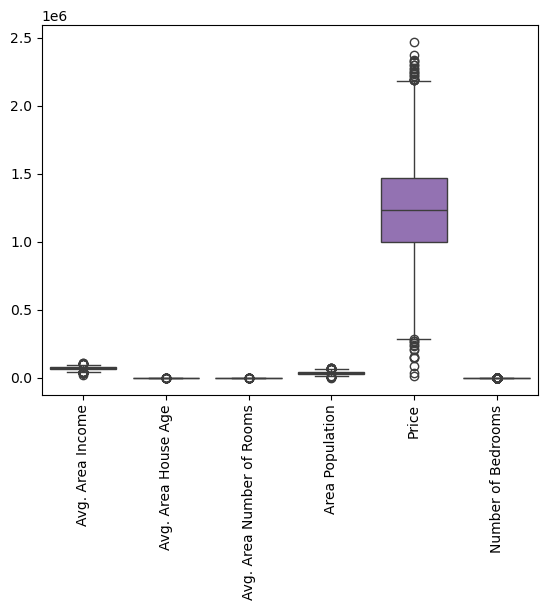

In [28]:
sns.boxplot(df)
plt.xticks(rotation=90)
plt.show()

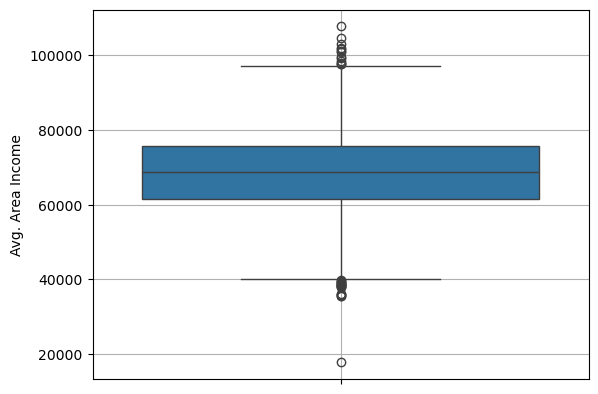

In [29]:
sns.boxplot(df["Avg. Area Income"])
plt.grid()
plt.show()

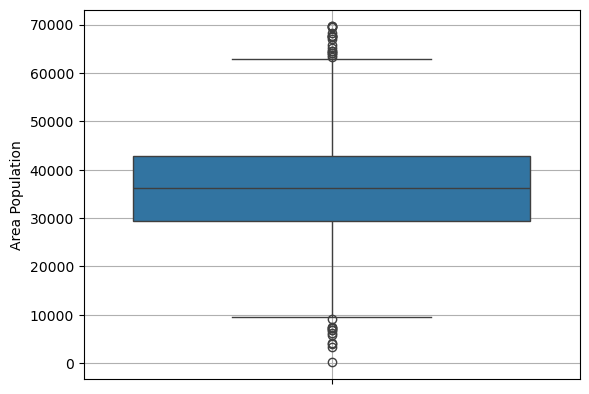

In [30]:
sns.boxplot(df["Area Population"])
plt.grid()
plt.show()

In [31]:
cols=df.select_dtypes(np.number).columns
cols

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Area Population', 'Price', 'Number of Bedrooms'],
      dtype='object')

--------------------------------------Avg. Area Income------------------------------


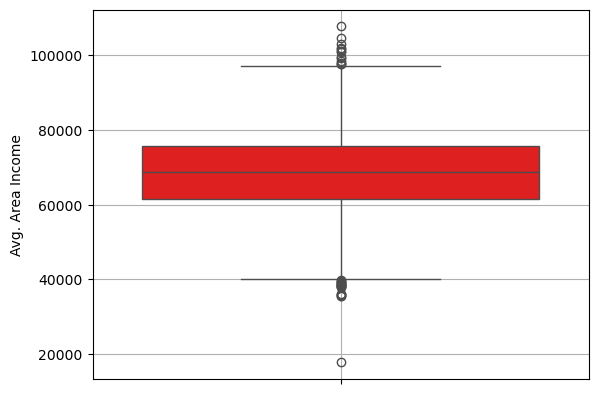

--------------------------------------Avg. Area House Age------------------------------


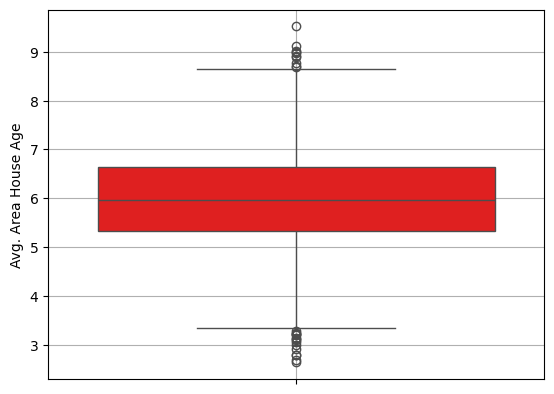

--------------------------------------Avg. Area Number of Rooms------------------------------


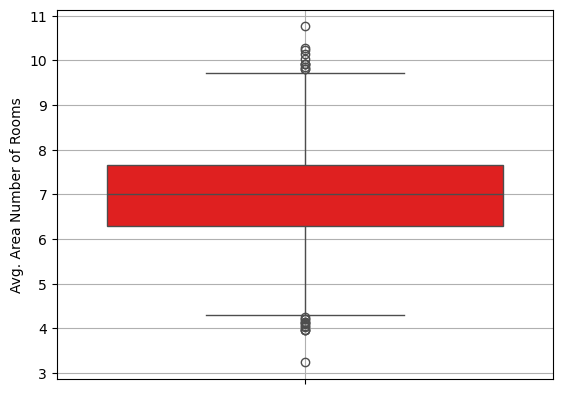

--------------------------------------Area Population------------------------------


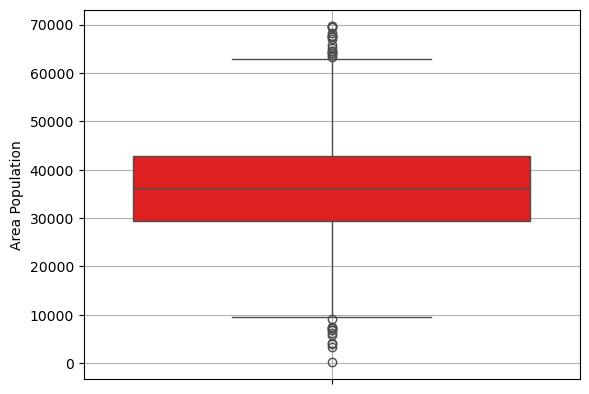

--------------------------------------Number of Bedrooms------------------------------


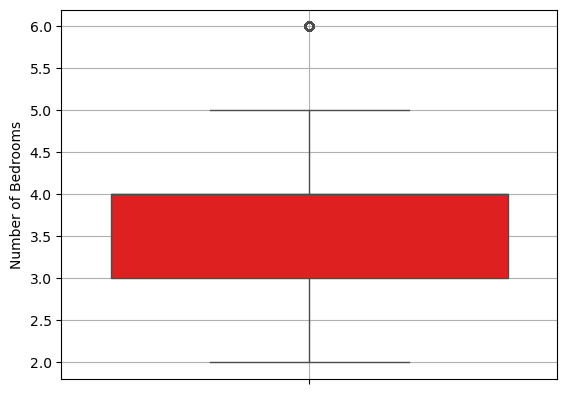

In [32]:
for i in cols:
    if i=="Price":
        pass
    else:
        print(f"--------------------------------------{i}------------------------------")
        sns.boxplot(df[i],color="r")
        plt.grid()
        plt.show()

##### IOR Inter Quartile Range

In [33]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(f"IQR:{IQR}")

IQR:Avg. Area Income              14302.776278
Avg. Area House Age               1.328525
Avg. Area Number of Rooms         1.366621
Area Population               13457.362067
Price                        473633.069163
Number of Bedrooms                1.000000
dtype: float64


In [34]:
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
print(f"Lower Bound for outliers \n{lower_bound} \n")
print(f"Upper Bound for outliers \n {upper_bound}")

Lower Bound for outliers 
Avg. Area Income              40026.397972
Avg. Area House Age               3.329495
Avg. Area Number of Rooms         4.249318
Area Population                9217.885601
Price                        287127.531305
Number of Bedrooms                1.500000
dtype: float64 

Upper Bound for outliers 
 Avg. Area Income             9.723750e+04
Avg. Area House Age          8.643597e+00
Avg. Area Number of Rooms    9.715803e+00
Area Population              6.304733e+04
Price                        2.181660e+06
Number of Bedrooms           5.500000e+00
dtype: float64


In [35]:
df[~((df<lower_bound)|(df>upper_bound)).any(axis=1)]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,Price,Number of Bedrooms
0,79545.458574,5.682861,7.009188,23086.800503,1.059034e+06,4
1,79248.642455,6.002900,6.730821,40173.072174,1.505891e+06,3
2,61287.067179,5.865890,8.512727,36882.159400,1.058988e+06,5
3,63345.240046,7.188236,5.586729,34310.242831,1.260617e+06,3
4,59982.197226,5.040555,7.839388,26354.109472,6.309435e+05,4
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,22837.361035,1.060194e+06,3
4996,78491.275435,6.999135,6.576763,25616.115489,1.482618e+06,4
4997,63390.686886,7.250591,4.805081,33266.145490,1.030730e+06,2
4998,68001.331235,5.534388,7.130144,42625.620156,1.198657e+06,5


In [36]:
data=df[~((df<lower_bound)|(df>upper_bound)).any(axis=1)]

--------------------------------------Avg. Area Income------------------------------


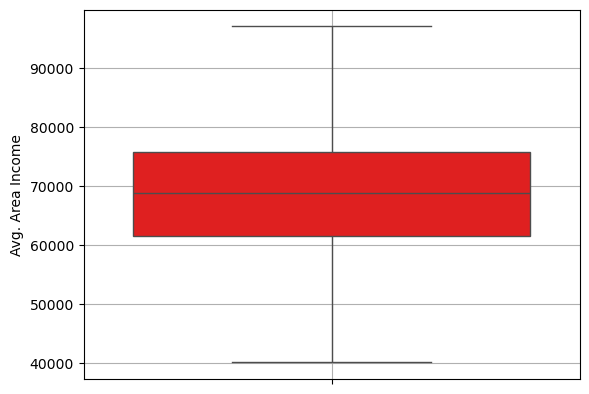

--------------------------------------Avg. Area House Age------------------------------


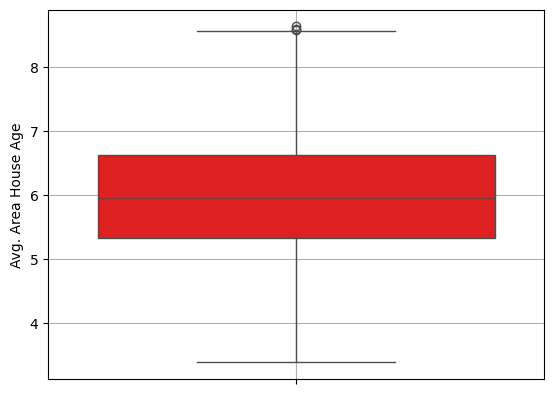

--------------------------------------Avg. Area Number of Rooms------------------------------


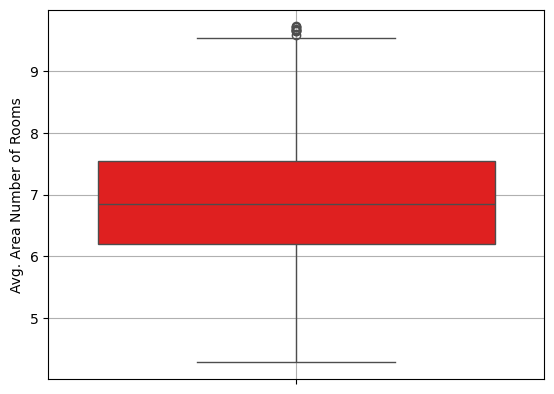

--------------------------------------Area Population------------------------------


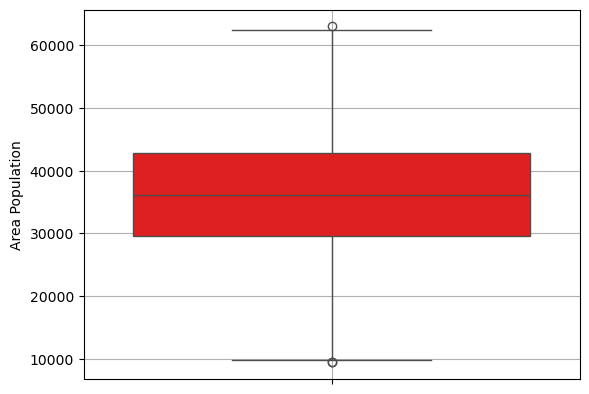

--------------------------------------Number of Bedrooms------------------------------


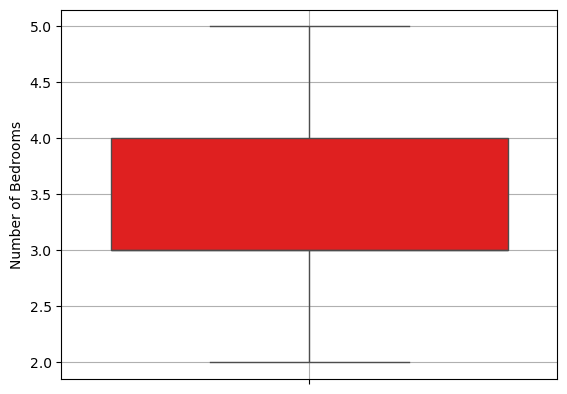

In [37]:
for i in cols:
    if i=="Price":
        pass
    else:
        print(f"--------------------------------------{i}------------------------------")
        sns.boxplot(data[i],color="r")
        plt.grid()
        plt.show()

##### Feature Selection

In [38]:
data.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,Price,Number of Bedrooms
Avg. Area Income,1.000000,-0.013087,-0.025357,-0.010650,0.634662,0.004843
Avg. Area House Age,-0.013087,1.000000,-0.017788,-0.024623,0.445816,-0.008336
Avg. Area Number of Rooms,-0.025357,-0.017788,1.000000,0.004670,0.325262,0.397246
Area Population,-0.010650,-0.024623,0.004670,1.000000,0.408388,-0.009578
Price,0.634662,0.445816,0.325262,0.408388,1.000000,0.142003
Number of Bedrooms,0.004843,-0.008336,0.397246,-0.009578,0.142003,1.000000


In [39]:
data.corr()["Price"]

Avg. Area Income             0.634662
Avg. Area House Age          0.445816
Avg. Area Number of Rooms    0.325262
Area Population              0.408388
Price                        1.000000
Number of Bedrooms           0.142003
Name: Price, dtype: float64

#### Model Building

In [40]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,Price,Number of Bedrooms
0,79545.458574,5.682861,7.009188,23086.800503,1.059034e+06,4
1,79248.642455,6.002900,6.730821,40173.072174,1.505891e+06,3
2,61287.067179,5.865890,8.512727,36882.159400,1.058988e+06,5
3,63345.240046,7.188236,5.586729,34310.242831,1.260617e+06,3
4,59982.197226,5.040555,7.839388,26354.109472,6.309435e+05,4


##### Seperate independent or dependent data

In [41]:
x=data.drop(columns=['Price'],axis=1)
y=data["Price"]

##### Split data into train and test

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#### Model Selection

##### a) Linear Regression

In [43]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [44]:
print(f"Training Accuracy:{round(lr.score(x_train,y_train),2)*100}%")
print(f"Test Accuracy:{round(lr.score(x_test,y_test),2)*100}%")


Training Accuracy:91.0%
Test Accuracy:91.0%


##### b)Decision Tree

In [45]:
dt=DecisionTreeRegressor(max_depth=9)
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=9)

In [46]:
print(f"Training Accuracy:{round(dt.score(x_train,y_train),2)*100}%")
print(f"Test Accuracy:{round(dt.score(x_test,y_test),2)*100}%")

Training Accuracy:93.0%
Test Accuracy:77.0%


##### c)Random Forest

In [47]:
rf=RandomForestRegressor(max_depth=9)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=9)

In [48]:
print(f"Training Accuracy:{round(rf.score(x_train,y_train),2)*100}%")
print(f"Test Accuracy:{round(rf.score(x_test,y_test),2)*100}%")

Training Accuracy:95.0%
Test Accuracy:88.0%


#### Model Training - Linear Regression

In [49]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [50]:
lr.coef_

array([2.15286896e+01, 1.67175994e+05, 1.19269117e+05, 1.50283743e+01,
       2.63687638e+03])

In [51]:
x.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Area Population', 'Number of Bedrooms'],
      dtype='object')

In [52]:
pd.DataFrame(lr.coef_,index=x.columns,columns=["Coefficients"])

,Coefficients
Avg. Area Income,21.528690
Avg. Area House Age,167175.993910
Avg. Area Number of Rooms,119269.117339
Area Population,15.028374
Number of Bedrooms,2636.876384


#### Model Prediction

In [53]:
y_train_pred=lr.predict(x_train)
y_test_pred=lr.predict(x_test)

#### Model Evaluation

In [54]:
# For Training Data
def training_evalutaion (actual,predicted):
    mse=mean_squared_error(actual,predicted)
    rmse=np.sqrt(mean_squared_error(actual,predicted))
    mae=mean_absolute_error(actual,predicted)
    r2=r2_score(actual,predicted)

    print(f"MSE:{mse}")
    print(f"RMSE:{rmse}")
    print(f"MAE:{mae}")
    print(f"R2:{r2}")

    plt.scatter(actual,predicted,color="r",label="Actual Price")
    plt.plot([actual.min(),actual.max()],[predicted.min(),predicted.max()],color="k",ls="--",lw=2)
    plt.title("Best Fit Line on Training Data")
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")

    plt.legend()
    plt.show()

In [55]:
# For Testing Data
def testing_evalutaion (actual,predicted):
    mse=mean_squared_error(actual,predicted)
    rmse=np.sqrt(mean_squared_error(actual,predicted))
    mae=mean_absolute_error(actual,predicted)
    r2=r2_score(actual,predicted)

    print(f"MSE:{mse}")
    print(f"RMSE:{rmse}")
    print(f"MAE:{mae}")
    print(f"R2:{r2}")

    plt.scatter(actual,predicted,color="g",label="Actual Price")
    plt.plot([actual.min(),actual.max()],[predicted.min(),predicted.max()],color="k",ls="--",lw=2)
    plt.title("Best Fit Line on Testing Data")
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")

    plt.legend()
    plt.show()

MSE:10125426462.914152
RMSE:100625.17807643449
MAE:81136.77847384977
R2:0.9132445229080721


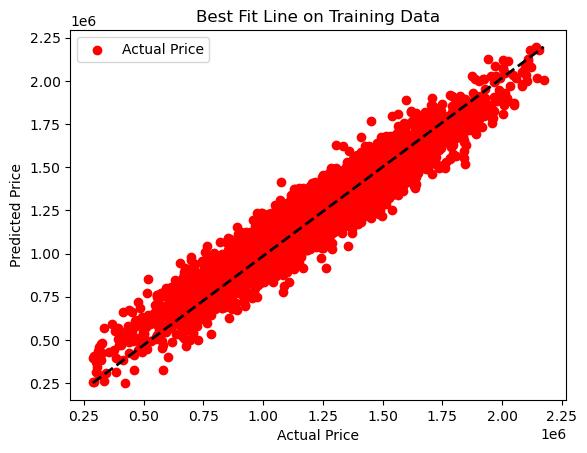

In [56]:
training_evalutaion(y_train,y_train_pred)

MSE:10416445748.159012
RMSE:102060.99033499043
MAE:81661.7970716361
R2:0.907942051025253


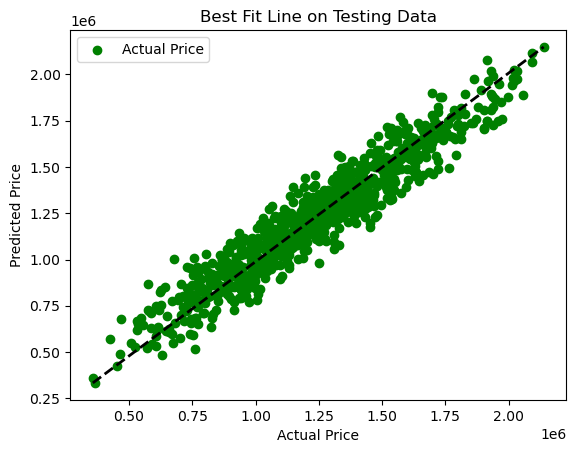

In [57]:
testing_evalutaion(y_test,y_test_pred)